In [2]:
import tensorflow as tf
import cv2
import os
import pickle
import numpy as np

In [3]:
categories=list(os.listdir('/home/jesterrexx/Documents/Dataset/Cat-Dog Dataset/training_set/training_set'))
dire='/home/jesterrexx/Documents/Dataset/Cat-Dog Dataset/training_set/training_set'

In [4]:
#first preprocess the training data 
import cv2
import matplotlib.pyplot as plt
features=[]
IMG_SIZE=100
for i in categories:
    path=os.path.join(dire,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            features.append([img_array,num_classes])
print(features)

[[array([[48, 50, 48, ..., 20, 20, 20],
       [46, 48, 52, ..., 24, 22, 22],
       [45, 47, 48, ..., 29, 29, 30],
       ...,
       [33, 33, 33, ..., 71, 66, 49],
       [37, 42, 39, ..., 65, 61, 63],
       [64, 53, 40, ..., 63, 66, 62]], dtype=uint8), 0], [array([[ 64,  57,  68, ..., 109, 108, 107],
       [ 62,  53,  61, ..., 110, 109, 108],
       [ 62,  52,  58, ..., 111, 110, 109],
       ...,
       [ 52,  52,  52, ..., 121, 122, 167],
       [ 54,  54,  54, ..., 110, 126, 170],
       [ 54,  54,  54, ..., 111, 125, 173]], dtype=uint8), 0], [array([[141, 141, 141, ..., 208, 207, 201],
       [141, 141, 141, ..., 208, 206, 197],
       [141, 141, 142, ..., 208, 203, 197],
       ...,
       [ 75,  64,  54, ..., 192, 193, 192],
       [ 58,  68,  60, ..., 188, 190, 190],
       [ 57,  69,  64, ..., 185, 187, 187]], dtype=uint8), 0], [array([[ 96,  97, 101, ...,  25,  19,  11],
       [ 73, 101, 106, ...,  17,  27,  20],
       [ 98,  55, 109, ...,  21,  16,  27],
       ...,
  

In [6]:
#lets create the dependent and independent variable 
x=[]
y=[]
for i,j in features:
    x.append(i)
    y.append(j)



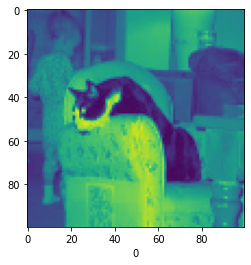

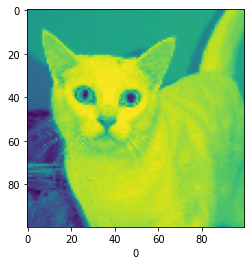

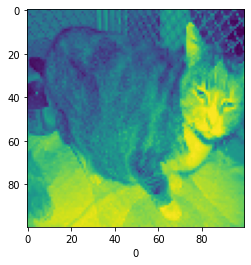

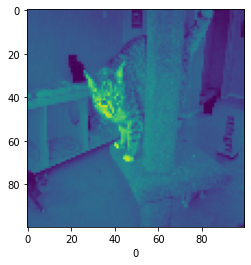

In [7]:
#lets visualize the training data
for i in range(1,5):
    plt.imshow(x[i])
    plt.xlabel(y[i])
    plt.show()

In [8]:
x=np.array(x).reshape(-1,100,100,1)
x.shape

(8005, 100, 100, 1)

In [9]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)
y.shape

(8005, 2)

In [87]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y,=train_test_split(x,y,random_state=0,test_size=0.2)

In [88]:
# Explore your dataset 
m1_train = train_x.shape[0]
m1_test = test_x.shape[0]
num1_px = train_x.shape[1]



In [89]:
# np.transpose(m1_train)
# np.transpose(m1_test)
# np.transpose(num1_px)

In [90]:
# np.transpose(train_x)
# np.transpose(train_y)
# np.transpose(test_x)
# np.transpose(test_y)

In [91]:
# print ("Number of training examples: " + str(m1_train))
# print ("Number of testing examples: " + str(m1_test))
# print ("Each image is of size: (" + str(num1_px) + ", " + str(num1_px) + ", 3)")
# print ("train_x_orig shape: " + str(train_x.shape))
# print ("train_y shape: " + str(train_y.shape))
# print ("test_x_orig shape: " + str(test_x.shape))
# print ("test_y shape: " + str(test_y.shape))

In [92]:
# Explore your dataset 
m_train = train_x.shape[0]
m_test = test_x.shape[0]
num_px = train_x.shape[1]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 6404
Number of testing examples: 1601
Each image is of size: (100, 100, 3)
train_x shape: (6404, 100, 100, 1)
train_y shape: (6404, 2)
test_x shape: (1601, 100, 100, 1)
test_y shape: (1601, 2)


In [93]:
# Reshape the training and test examples 
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


print('--------------------------------------------------')

 
print ("train_set_x_flatten shape: " + str(train_x_flatten.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_set_x_flatten shape: " + str(test_x_flatten.shape))
print ("test_y shape: " + str(test_y.shape))
print ("sanity check after reshaping: " + str(train_x_flatten[0:5,0]))



train_x's shape: (10000, 6404)
test_x's shape: (10000, 1601)
--------------------------------------------------
train_set_x_flatten shape: (10000, 6404)
train_y shape: (6404, 2)
test_set_x_flatten shape: (10000, 1601)
test_y shape: (1601, 2)
sanity check after reshaping: [53 58 61 60 60]


In [94]:
print('train_x shape: ',train_x.shape)
print('train_y shape: ',train_y.shape)
print('test_x shape: ',test_x.shape)
print('test_y shape: ',test_y.shape)

train_x shape:  (10000, 6404)
train_y shape:  (6404, 2)
test_x shape:  (10000, 1601)
test_y shape:  (1601, 2)


In [29]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [30]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
#     assert(W1.shape == (n_h, n_x))
#     assert(b1.shape == (n_h, 1))
#     assert(W2.shape == (n_y, n_h))
#     assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [31]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [32]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [33]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [34]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [35]:
import numpy as np
def linear_forward_test_case():
    np.random.seed(1)
    A=np.random.randn(3,2)
    W=np.random.randn(1,3)
    b=np.random.randn(1,1)
    return A,W,b

In [36]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


In [37]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
#     assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [38]:
def linear_activation_forward_test_case():
    np.random.seed(2)
    A_prev=np.random.randn(3,2)
    W=np.random.randn(1,3)
    b=np.random.randn(1,1)
    return A_prev,W,b

In [40]:
def sigmoid(Z):
    A=1/(1+np.exp(-Z))
    cache=Z
    return A,cache

In [41]:
def sigmoid_backward(dA,cache):
    Z=cache
    s=1/(1 + np.exp(-Z))
    dZ=dA*s*(1-s)
   # assert (dZ.shape==Z.shape)
    return dZ
    

In [42]:
def relu(Z):
    A=np.maximum(0,Z)
#     assert (A.shape==Z.shape)
    cache=Z
    return A,cache


In [43]:
def relu_backward(dA,cache):
    Z=cache
    dZ=np.array(dA,copy=True)
    dZ[Z<=0]=0
#     assert (dZ.shape==Z.shape)
    return dZ

In [44]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [45]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache =linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [46]:
def L_model_forward_test_case():
    np.random.seed(1)
    X=np.random.randn(4,2)
    W1=np.random.randn(3,4)
    b1=np.random.randn(3,1)
    W2=np.random.randn(1,3)
    b2=np.random.randn(1,1)
    parameters={'W1':W1,
                'b1':b1,
                'W2':W2,
                'b2':b2}
    return X, parameters

In [47]:
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


In [48]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
#     assert(cost.shape == ())
    
    return cost

In [49]:
def compute_cost_test_case():
    Y=np.array([[1,1,1]])
    aL=np.array([[.8,.9,0.4]])
    return Y, aL

In [50]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


In [51]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]


    dW = np.dot(dZ, cache[0].T) / m
    db = np.squeeze(np.sum(dZ, axis=1, keepdims=True)) / m
    dA_prev = np.dot(cache[1].T, dZ)
    
#     assert (dA_prev.shape == A_prev.shape)
#     assert (dW.shape == W.shape)
#     assert (isinstance(db, float))

    
    return dA_prev, dW, db

In [52]:
def linear_backward_test_case():
    np.random.seed(1)
    dZ=np.random.randn(1,2)
    A=np.random.randn(3,2)
    W=np.random.randn(1,3)
    b=np.random.randn(1,1)
    linear_cache=(A,W,b)
    return dZ, linear_cache

In [53]:
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = 0.5062944750065832


In [54]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)

    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [55]:
def linear_activation_backward_test_case():
    np.random.seed(2)
    dA=np.random.randn(1,2)
    A=np.random.randn(3,2)
    W=np.random.randn(1,3)
    b=np.random.randn(1,1)
    Z=np.random.randn(1,2)
    linear_cache=(A,W,b)
    activation_cache=Z
    linear_activation_cache=(linear_cache,activation_cache)
    return dA, linear_activation_cache

In [56]:
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = -0.057296222176291135

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = -0.2083789237027353


In [57]:
def L_model_backward(AL, Y, caches):
    grads={}
    L=len(caches)
    m=AL.shape[1]
    Y=Y.reshape(AL.shape)
    
    dAL=-(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    dA_prev,dW,db=linear_activation_backward(dAL, caches[L-1],'sigmoid')
    grads['dA'+str(L)],grads['dW'+str(L)],grads['db'+str(L)]=dA_prev,dW,db
    
    for l in reversed(range(L-1)):
        dA=dA_prev
        dA_prev,dW,db=linear_activation_backward(dA,caches[l],'relu')
        grads['dA'+str(l+1)]=dA_prev
        grads['dW'+str(l+1)]=dW
        grads['db'+str(l+1)]=db
    return grads
    

In [58]:
def L_model_backward_test_case():
    np.random.seed(3)
    AL=np.random.rand(1,2)
    Y=np.array([[1,0]])
    
    A1=np.random.randn(4,2)
    W1=np.random.randn(3,4)
    b1=np.random.randn(3,1)
    Z1=np.random.randn(3,2)
    linear_cache_activation_1=((A1,W1,b1),Z1)
    
    A2=np.random.randn(3,2)
    W2=np.random.randn(1,3)
    b2=np.random.randn(1,1)
    Z2=np.random.randn(1,2)
    linear_cache_activation_2=((A2,W2,b2),Z2)
     
    caches=(linear_cache_activation_1, linear_cache_activation_2)
    
    return AL, Y, caches
    
    

In [59]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL,Y_assess, caches)
print(grads)

{'dA2': array([[ 0.41933436, -0.84979756],
       [-0.46033181,  0.9328805 ],
       [ 0.05402625, -0.10948632]]), 'dW2': array([[-0.92096336, -0.20527897,  0.11200993]]), 'db2': 0.21021261307668124, 'dA1': array([[ 0.        ,  1.00896326],
       [ 0.        , -0.63119809],
       [ 0.        , -0.61919554],
       [ 0.        , -1.43027517]]), 'dW1': array([[0.79179578, 0.15073666, 0.26641182, 0.20276936],
       [0.        , 0.        , 0.        , 0.        ],
       [0.10201348, 0.01942063, 0.034324  , 0.02612442]]), 'db1': array([-0.42489878,  0.        , -0.05474316])}


In [60]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    ### END CODE HERE ###
    return parameters

In [61]:
def update_parameters_test_case():
    np.random.seed(2)
    W1=np.random.randn(3,4)
    b1=np.random.randn(3,1)
    W2=np.random.randn(1,3)
    b2=np.random.randn(1,1)
    parameters={'W1':W1,
                'b1':b1,
                'W2':W2,
                'b2':b2}
    
    np.random.seed(3)
    dW1=np.random.randn(3,4)
    db1=np.random.randn(3,1)
    dW2=np.random.randn(1,3)
    db2=np.random.randn(1,1)
    grads={'dW1':dW1,
          'db1':db1,
           'dW2':dW2,
           'db2':db2}
    
    return parameters, grads

In [62]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [85]:
# Explore your dataset 
m_train = train_x.shape[0]
m_test = test_x.shape[0]
num_px = train_x.shape[1]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 10000
Number of testing examples: 10000
Each image is of size: (6404, 6404, 3)
train_x_orig shape: (10000, 6404)
train_y shape: (6404, 2)
test_x_orig shape: (10000, 1601)
test_y shape: (1601, 2)


In [95]:
train1_y=np.reshape(train_y,(2,6404))

In [96]:
train1_y.shape

(2, 6404)

In [97]:
n_x =10000      # num_px * num_px * 3
n_h = 6404
n_y = 2
layers_dims = (n_x, n_h, n_y)

In [98]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):

    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [99]:
parameters = two_layer_model(train_x, train1_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

Cost after iteration 0: 1.3898280667292573


ValueError: operands could not be broadcast together with shapes (2,6404) (2,2) 